In [1]:
import warnings
warnings.filterwarnings('ignore')

# Splitting & Normalization Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
df = pd.read_csv('/content/drive/MyDrive/data skripsi/df_lq45_fix.csv')

In [5]:
df

,date,open,high,low,close,sentiment_score
0,2020-01-02 00:00:00+07:00,1017.159973,1017.520020,1007.500000,1011.619995,-0.37530
1,2020-01-03 00:00:00+07:00,1016.719971,1021.489990,1012.969971,1021.489990,0.77830
2,2020-01-06 00:00:00+07:00,1012.929993,1016.159973,1005.830017,1010.229980,-0.78450
3,2020-01-07 00:00:00+07:00,1013.780029,1016.530029,1008.489990,1014.640015,0.76500
4,2020-01-08 00:00:00+07:00,1007.099976,1010.440002,1004.099976,1005.450012,-0.12060
...,...,...,...,...,...,...
991,2024-01-25 00:00:00+07:00,963.450012,971.130005,959.200012,959.799988,0.49390
992,2024-01-26 00:00:00+07:00,954.159973,957.119995,945.039978,951.489990,0.11908
993,2024-01-29 00:00:00+07:00,953.669983,961.919983,952.359985,961.919983,0.36010
994,2024-01-30 00:00:00+07:00,959.659973,975.229980,957.270020,971.700012,0.49390


In [6]:
df['date'] = pd.to_datetime(df['date']).dt.tz_convert('Asia/Jakarta')

In [7]:
df_scaler = df[['close', 'sentiment_score']]

In [8]:
df_scaler['target'] = df_scaler['close']

In [9]:
df_scaler

,close,sentiment_score,target
0,1011.619995,-0.37530,1011.619995
1,1021.489990,0.77830,1021.489990
2,1010.229980,-0.78450,1010.229980
3,1014.640015,0.76500,1014.640015
4,1005.450012,-0.12060,1005.450012
...,...,...,...
991,959.799988,0.49390,959.799988
992,951.489990,0.11908,951.489990
993,961.919983,0.36010,961.919983
994,971.700012,0.49390,971.700012


In [10]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_scaler, test_size=0.1, shuffle=False)
train_df, val_df = train_test_split(train_df, test_size=0.2, shuffle=False)

In [11]:
print('length of train data: ', len(train_df))
print('length of validation data: ', len(val_df))
print('length of test data: ', len(test_df))

length of train data:  716
length of validation data:  180
length of test data:  100


In [12]:
scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

In [13]:
x_train = train_df.copy()[['close','sentiment_score']]
x_train = scaler.fit_transform(x_train)

x_train = pd.DataFrame(x_train, columns=['close', 'sentiment_score'])
x_train

,close,sentiment_score
0,0.857658,0.247460
1,0.876690,0.945090
2,0.854978,0.000000
3,0.863481,0.937046
4,0.845761,0.401488
...,...,...
711,0.826035,0.692187
712,0.851218,0.773101
713,0.827462,0.611272
714,0.815179,0.611272


In [14]:
x_val = val_df.copy()[['close','sentiment_score']]
x_val = scaler.transform(x_val)

x_val = pd.DataFrame(x_val, columns=['close', 'sentiment_score'])
x_val

,close,sentiment_score
0,0.761671,0.611272
1,0.730318,0.611272
2,0.727695,0.611272
3,0.706080,0.611272
4,0.717148,0.773101
...,...,...
175,0.771543,0.773101
176,0.777251,0.773101
177,0.774840,0.773101
178,0.771987,0.773101


In [15]:
x_test = test_df.copy()[['close','sentiment_score']]
x_test = scaler.transform(x_test)

x_test = pd.DataFrame(x_test, columns=['close', 'sentiment_score'])
x_test

,close,sentiment_score
0,0.743430,0.611272
1,0.755655,0.773101
2,0.745512,0.611272
3,0.746997,0.692187
4,0.749658,0.773101
...,...,...
95,0.757737,0.773101
96,0.741713,0.546432
97,0.761825,0.692187
98,0.780683,0.773101


In [16]:
y_train = train_df.copy()['target'].values
y_train = target_scaler.fit_transform(y_train.reshape(-1,1))

y_train = pd.DataFrame(y_train, columns=['target'])
y_train

,target
0,0.857658
1,0.876690
2,0.854978
3,0.863481
4,0.845761
...,...
711,0.826035
712,0.851218
713,0.827462
714,0.815179


In [17]:
y_val = val_df.copy()['target'].values
y_val = target_scaler.transform(y_val.reshape(-1,1))

y_val = pd.DataFrame(y_val, columns=['target'])
y_val

,target
0,0.761671
1,0.730318
2,0.727695
3,0.706080
4,0.717148
...,...
175,0.771543
176,0.777251
177,0.774840
178,0.771987


In [18]:
y_test = test_df.copy()['target'].values
y_test = target_scaler.transform(y_test.reshape(-1,1))

y_test = pd.DataFrame(y_test, columns=['target'])
y_test

,target
0,0.743430
1,0.755655
2,0.745512
3,0.746997
4,0.749658
...,...
95,0.757737
96,0.741713
97,0.761825
98,0.780683


In [19]:
train_df = pd.concat([x_train, y_train], axis=1)
val_df = pd.concat([x_val, y_val], axis=1)
test_df = pd.concat([x_test, y_test], axis=1)

# Create Window Data

In [20]:
import tensorflow as tf

In [21]:
train_df

,close,sentiment_score,target
0,0.857658,0.247460,0.857658
1,0.876690,0.945090,0.876690
2,0.854978,0.000000,0.854978
3,0.863481,0.937046,0.863481
4,0.845761,0.401488,0.845761
...,...,...,...
711,0.826035,0.692187,0.826035
712,0.851218,0.773101,0.851218
713,0.827462,0.611272,0.827462
714,0.815179,0.611272,0.815179


In [22]:
# periode data train

df.date.iloc[0:716].describe()

count                                    716
mean     2021-06-21 03:35:11.731843584+07:00
min                2020-01-02 00:00:00+07:00
25%                2020-09-24 18:00:00+07:00
50%                2021-06-24 12:00:00+07:00
75%                2022-03-14 06:00:00+07:00
max                2022-12-05 00:00:00+07:00
Name: date, dtype: object

In [23]:
val_df

,close,sentiment_score,target
0,0.761671,0.611272,0.761671
1,0.730318,0.611272,0.730318
2,0.727695,0.611272,0.727695
3,0.706080,0.611272,0.706080
4,0.717148,0.773101,0.717148
...,...,...,...
175,0.771543,0.773101,0.771543
176,0.777251,0.773101,0.777251
177,0.774840,0.773101,0.774840
178,0.771987,0.773101,0.771987


In [24]:
# periode data val

df.date.iloc[716:896].describe()

count                                    180
mean     2023-04-20 13:19:59.999999744+07:00
min                2022-12-06 00:00:00+07:00
25%                2023-02-07 18:00:00+07:00
50%                2023-04-15 12:00:00+07:00
75%                2023-07-04 06:00:00+07:00
max                2023-09-07 00:00:00+07:00
Name: date, dtype: object

In [25]:
test_df

,close,sentiment_score,target
0,0.743430,0.611272,0.743430
1,0.755655,0.773101,0.755655
2,0.745512,0.611272,0.745512
3,0.746997,0.692187,0.746997
4,0.749658,0.773101,0.749658
...,...,...,...
95,0.757737,0.773101,0.757737
96,0.741713,0.546432,0.741713
97,0.761825,0.692187,0.761825
98,0.780683,0.773101,0.780683


In [26]:
# periode data test

df.date.iloc[896:].describe()

count                                    100
mean     2023-11-19 07:11:59.999999744+07:00
min                2023-09-08 00:00:00+07:00
25%                2023-10-15 06:00:00+07:00
50%                2023-11-18 12:00:00+07:00
75%                2023-12-23 06:00:00+07:00
max                2024-01-31 00:00:00+07:00
Name: date, dtype: object

In [27]:
class DataWindow:

    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None, batch_size=None):

        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        self.batch_size = batch_size

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :-1]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=False,
            batch_size=self.batch_size
        )

        ds = ds.map(self.split_to_inputs_labels)
        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
      return self.make_dataset(self.test_df)

In [29]:
data = DataWindow(input_width=1, label_width=1, shift=1, label_columns=['target'], batch_size=32)

In [30]:
data_train = data.train
data_val = data.val
data_test = data.test

In [31]:
for i, item in enumerate(data_train):
  if i < 5:
    print(item)
  else:
    break

(<tf.Tensor: shape=(32, 1, 2), dtype=float32, numpy=
array([[[0.857658  , 0.24746008]],

       [[0.8766897 , 0.9450895 ]],

       [[0.8549778 , 0.        ]],

       [[0.86348134, 0.93704647]],

       [[0.8457609 , 0.40148765]],

       [[0.86772346, 0.8628145 ]],

       [[0.8699795 , 0.8326379 ]],

       [[0.88401705, 0.98494196]],

       [[0.89757234, 0.825895  ]],

       [[0.88359267, 0.02050073]],

       [[0.8850198 , 0.9450895 ]],

       [[0.8924048 , 0.808932  ]],

       [[0.8776924 , 0.02050073]],

       [[0.8789843 , 0.8447629 ]],

       [[0.8754364 , 0.22871311]],

       [[0.8826672 , 0.47441944]],

       [[0.88442194, 0.7731011 ]],

       [[0.84256   , 0.47441944]],

       [[0.8365439 , 0.6237603 ]],

       [[0.8358691 , 0.7731011 ]],

       [[0.81057066, 0.7731011 ]],

       [[0.7619406 , 0.7731011 ]],

       [[0.7451265 , 0.47441944]],

       [[0.76745546, 0.47441944]],

       [[0.79005426, 0.7731011 ]],

       [[0.7884153 , 0.7731011 ]],

       [[0.

In [32]:
for item in data_val:
  print(item)

(<tf.Tensor: shape=(32, 1, 2), dtype=float32, numpy=
array([[[0.76167077, 0.6112724 ]],

       [[0.7303177 , 0.6112724 ]],

       [[0.7276952 , 0.6112724 ]],

       [[0.7060798 , 0.6112724 ]],

       [[0.7171478 , 0.7731011 ]],

       [[0.74422014, 0.7731011 ]],

       [[0.7410771 , 0.6921868 ]],

       [[0.7241087 , 0.6112724 ]],

       [[0.74113506, 0.6921868 ]],

       [[0.73276645, 0.61843854]],

       [[0.7174371 , 0.6112724 ]],

       [[0.72275895, 0.6921868 ]],

       [[0.72283614, 0.6112724 ]],

       [[0.7084901 , 0.5117925 ]],

       [[0.7102063 , 0.6112724 ]],

       [[0.72029084, 0.7731011 ]],

       [[0.70739096, 0.5117925 ]],

       [[0.7193074 , 0.7731011 ]],

       [[0.7141205 , 0.49933478]],

       [[0.71007127, 0.5117925 ]],

       [[0.72044516, 0.7731011 ]],

       [[0.69744134, 0.6112724 ]],

       [[0.6610555 , 0.6112724 ]],

       [[0.6675345 , 0.7731011 ]],

       [[0.6730106 , 0.7731011 ]],

       [[0.6445307 , 0.6112724 ]],

       [[0.

In [33]:
for item in data_test:
  print(item)

(<tf.Tensor: shape=(32, 1, 2), dtype=float32, numpy=
array([[[0.74342966, 0.6112724 ]],

       [[0.7556546 , 0.7731011 ]],

       [[0.7455122 , 0.6112724 ]],

       [[0.7469968 , 0.6921868 ]],

       [[0.7496578 , 0.7731011 ]],

       [[0.76043665, 0.7731011 ]],

       [[0.7501205 , 0.6112724 ]],

       [[0.767841  , 0.7731011 ]],

       [[0.7782342 , 0.7731011 ]],

       [[0.77096474, 0.6112724 ]],

       [[0.77383786, 0.7731011 ]],

       [[0.7631554 , 0.6112724 ]],

       [[0.7434682 , 0.6112724 ]],

       [[0.7452422 , 0.7731011 ]],

       [[0.7440274 , 0.6921868 ]],

       [[0.7525116 , 0.6921868 ]],

       [[0.7505448 , 0.6112724 ]],

       [[0.73735565, 0.6112724 ]],

       [[0.72856295, 0.6921868 ]],

       [[0.7321109 , 0.7731011 ]],

       [[0.72838944, 0.7731011 ]],

       [[0.73182166, 0.6921868 ]],

       [[0.7286015 , 0.6921868 ]],

       [[0.72621053, 0.6112724 ]],

       [[0.7186904 , 0.7731011 ]],

       [[0.71003264, 0.6112724 ]],

       [[0.

# Modeling with News

In [34]:
from keras.models import Sequential, Model
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import Dropout
from keras.layers import Input
from keras.optimizers import Adam, SGD

In [35]:
model = Sequential()
model.add(Bidirectional(LSTM(200, activation='relu'), input_shape=(1, 2)))
model.add(Dropout(0.4))
model.add(Dense(1))

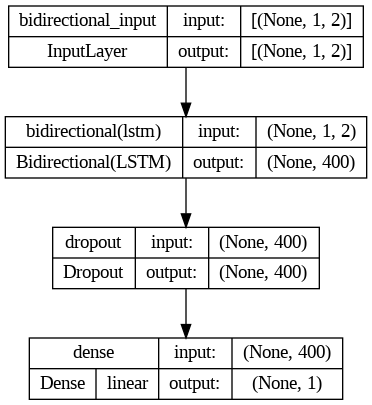

In [36]:
import tensorflow as tf

tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [37]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 400)               324800    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 1)                 401       
                                                                 
Total params: 325201 (1.24 MB)
Trainable params: 325201 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## Manual processing

In [38]:
print(model.get_weight_paths())

{'bidirectional.forward_layer.cell.kernel': <tf.Variable 'bidirectional/forward_lstm/lstm_cell/kernel:0' shape=(2, 800) dtype=float32, numpy=
array([[ 0.06082007, -0.03422504,  0.00590568, ..., -0.04554199,
        -0.00988174, -0.0602688 ],
       [-0.08382573,  0.04426599,  0.02971102, ...,  0.02516063,
        -0.0139138 ,  0.02844011]], dtype=float32)>, 'bidirectional.forward_layer.cell.recurrent_kernel': <tf.Variable 'bidirectional/forward_lstm/lstm_cell/recurrent_kernel:0' shape=(200, 800) dtype=float32, numpy=
array([[ 0.01625884, -0.01282479, -0.01732483, ..., -0.03616225,
         0.05959805, -0.02333309],
       [ 0.03287629,  0.03045797, -0.02094405, ...,  0.03094923,
        -0.01342607,  0.00116066],
       [-0.03355075, -0.00490835,  0.06351101, ...,  0.05894743,
         0.05440695,  0.01709133],
       ...,
       [ 0.02901933, -0.08024208,  0.04868608, ...,  0.03617172,
        -0.00917348,  0.01810898],
       [ 0.03295733, -0.05670319, -0.0419712 , ...,  0.0556329 ,


In [39]:
len(model.get_weight_paths())

8

In [40]:
# Take parameter in layer BILSTM

W_forward = model.layers[0].get_weights()[0]
U_forward = model.layers[0].get_weights()[1]
b_forward = model.layers[0].get_weights()[2]

W_backward = model.layers[0].get_weights()[3]
U_backward = model.layers[0].get_weights()[4]
b_backward = model.layers[0].get_weights()[5]

# Take parameter in FC 1 layer

W_fc = model.layers[2].get_weights()[0]
b_fc = model.layers[2].get_weights()[1]

In [41]:
units = 200 # must same like BILSTM units

##################### FORWARD #########################################

W_i_forward = W_forward[:, :units]
W_f_forward = W_forward[:, units: units * 2]
W_c_forward = W_forward[:, units * 2: units * 3]
W_o_forward = W_forward[:, units * 3:]

U_i_forward = U_forward[:, :units]
U_f_forward = U_forward[:, units: units * 2]
U_c_forward = U_forward[:, units * 2: units * 3]
U_o_forward = U_forward[:, units * 3:]

b_i_forward = b_forward[:units]
b_f_forward = b_forward[units: units * 2]
b_c_forward = b_forward[units * 2: units * 3]
b_o_forward = b_forward[units * 3:]

##################### BACKWARD #########################################

W_i_backward = W_backward[:, :units]
W_f_backward = W_backward[:, units: units * 2]
W_c_backward = W_backward[:, units * 2: units * 3]
W_o_backward = W_backward[:, units * 3:]

U_i_backward = U_backward[:, :units]
U_f_backward = U_backward[:, units: units * 2]
U_c_backward = U_backward[:, units * 2: units * 3]
U_o_backward = U_backward[:, units * 3:]

b_i_backward = b_backward[:units]
b_f_backward = b_backward[units: units * 2]
b_c_backward = b_backward[units * 2: units * 3]
b_o_backward = b_backward[units * 3:]

In [42]:
for i, item in enumerate(data_train):
  if i == 0:
    data = item
  else:
    break

In [43]:
import numpy as np

x_array, label = data
x_array = np.array(x_array).reshape(32, 2)

In [44]:
x_array

array([[0.857658  , 0.24746008],
       [0.8766897 , 0.9450895 ],
       [0.8549778 , 0.        ],
       [0.86348134, 0.93704647],
       [0.8457609 , 0.40148765],
       [0.86772346, 0.8628145 ],
       [0.8699795 , 0.8326379 ],
       [0.88401705, 0.98494196],
       [0.89757234, 0.825895  ],
       [0.88359267, 0.02050073],
       [0.8850198 , 0.9450895 ],
       [0.8924048 , 0.808932  ],
       [0.8776924 , 0.02050073],
       [0.8789843 , 0.8447629 ],
       [0.8754364 , 0.22871311],
       [0.8826672 , 0.47441944],
       [0.88442194, 0.7731011 ],
       [0.84256   , 0.47441944],
       [0.8365439 , 0.6237603 ],
       [0.8358691 , 0.7731011 ],
       [0.81057066, 0.7731011 ],
       [0.7619406 , 0.7731011 ],
       [0.7451265 , 0.47441944],
       [0.76745546, 0.47441944],
       [0.79005426, 0.7731011 ],
       [0.7884153 , 0.7731011 ],
       [0.7909027 , 0.7731011 ],
       [0.77420425, 0.47441944],
       [0.7723531 , 0.47441944],
       [0.7600124 , 0.7731011 ],
       [0.

In [45]:
x_array.shape

(32, 2)

In [46]:
# prompt: create h and c with 0 values and  shape (1,200)

h = np.zeros(shape=(32, 200))
c = np.zeros(shape=(32, 200))
print(h)
print(c)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [47]:
W_f_forward.T

array([[ 0.07294036, -0.06465943],
       [ 0.06474453,  0.08327523],
       [ 0.00203831,  0.02412469],
       [ 0.08027965,  0.03019083],
       [ 0.00226622, -0.03009988],
       [-0.0447783 ,  0.08586872],
       [-0.03647248, -0.07803931],
       [ 0.02818526, -0.06117813],
       [-0.03623254, -0.04610954],
       [-0.02235603, -0.04107054],
       [ 0.00643028,  0.03259115],
       [-0.04458093, -0.00342352],
       [-0.04339832,  0.02009369],
       [ 0.05101831, -0.03761747],
       [ 0.07615022, -0.00195193],
       [-0.0105283 , -0.07728927],
       [ 0.05972992, -0.03794317],
       [ 0.0060836 , -0.01342162],
       [-0.0348624 , -0.0532953 ],
       [ 0.0791976 ,  0.04499064],
       [-0.07720497,  0.07659936],
       [-0.05907942,  0.01798363],
       [-0.0098118 , -0.00790049],
       [-0.01439602,  0.04969569],
       [ 0.05161646, -0.05006154],
       [-0.04171613,  0.04201086],
       [ 0.02780011,  0.03835693],
       [ 0.04205501,  0.01533303],
       [ 0.04734737,

In [48]:
W_c_forward.T

array([[ 3.05041969e-02,  5.20098358e-02],
       [-5.39921187e-02, -7.05689862e-02],
       [-3.97296660e-02, -5.92212118e-02],
       [ 5.13780266e-02, -2.12550461e-02],
       [ 1.41906887e-02, -2.35823095e-02],
       [-1.49478391e-02,  5.62913716e-02],
       [-3.42250653e-02, -7.73409307e-02],
       [-4.56213802e-02,  4.03580815e-03],
       [-6.53669909e-02,  1.76445395e-03],
       [ 8.33946466e-02, -2.81202830e-02],
       [-1.75811127e-02, -5.95350154e-02],
       [ 7.21680224e-02,  6.18442148e-03],
       [-3.72606069e-02, -1.35162473e-02],
       [-1.28827244e-03, -6.76738173e-02],
       [ 2.96807438e-02,  5.96271455e-03],
       [ 6.25146478e-02, -4.50637676e-02],
       [ 3.66989449e-02,  8.40566158e-02],
       [-5.44728152e-02, -6.20085075e-02],
       [-9.13991034e-03, -7.34556392e-02],
       [ 8.10542554e-02,  2.30492130e-02],
       [ 1.41012892e-02,  1.14337280e-02],
       [ 7.64762163e-02, -3.09981294e-02],
       [-4.56849597e-02, -4.52046767e-02],
       [ 1.

In [49]:
W_i_forward.T

array([[ 0.06082007, -0.08382573],
       [-0.03422504,  0.04426599],
       [ 0.00590568,  0.02971102],
       [ 0.03908092, -0.02393651],
       [ 0.07955064,  0.03353269],
       [ 0.06661321,  0.0489507 ],
       [-0.07871212, -0.02084354],
       [ 0.07808486,  0.02684923],
       [-0.04111197, -0.0841684 ],
       [-0.06183434,  0.01150174],
       [ 0.03445968,  0.02872106],
       [ 0.00253748,  0.03463851],
       [ 0.08563977,  0.01979131],
       [-0.07008483, -0.01273198],
       [-0.03182166, -0.00087057],
       [-0.01876032, -0.0808557 ],
       [-0.03929215, -0.02971699],
       [ 0.0319533 ,  0.02852528],
       [ 0.0063218 ,  0.03355941],
       [-0.06943767, -0.08079281],
       [-0.05726887, -0.04501188],
       [ 0.06436168, -0.0511923 ],
       [ 0.00062463,  0.02672348],
       [ 0.01784864,  0.02229486],
       [-0.06609851, -0.02877218],
       [ 0.0252749 , -0.0321059 ],
       [-0.0636598 , -0.00065695],
       [-0.00915623, -0.05738522],
       [-0.07535514,

In [50]:
W_o_forward.T

array([[-0.02387489, -0.04018454],
       [ 0.07371943,  0.02688241],
       [ 0.00927731,  0.02292163],
       [-0.08351657, -0.04910343],
       [-0.05456384, -0.07119985],
       [-0.02207372,  0.0050285 ],
       [-0.00936137, -0.05330192],
       [ 0.03326874, -0.05729583],
       [ 0.06115654, -0.02228853],
       [ 0.06671499, -0.03143005],
       [ 0.02041537, -0.0846898 ],
       [-0.0359186 , -0.04712888],
       [ 0.06536472,  0.00573426],
       [ 0.04869723, -0.04869866],
       [ 0.04526408,  0.03720402],
       [ 0.05947022,  0.04682437],
       [ 0.07810192, -0.05093684],
       [ 0.04953405, -0.06038724],
       [-0.02507004,  0.06532387],
       [ 0.04846413, -0.04721752],
       [ 0.02257419,  0.04026683],
       [-0.01466546,  0.03435346],
       [-0.06555548, -0.04495414],
       [-0.07916893,  0.03352697],
       [ 0.08208044,  0.07395096],
       [ 0.06765127,  0.03013784],
       [ 0.0552059 ,  0.02448507],
       [-0.07637304, -0.02719844],
       [ 0.05542423,

In [51]:
U_f_forward.T

array([[-0.00042025, -0.00984361,  0.00711839, ..., -0.01094125,
         0.02708507, -0.02540514],
       [ 0.0048295 ,  0.00795651,  0.01130477, ...,  0.01153575,
        -0.05206446, -0.02234049],
       [-0.0653628 , -0.0208075 , -0.01129276, ..., -0.03740997,
        -0.01982927, -0.00101005],
       ...,
       [ 0.05338139,  0.0736088 , -0.02904268, ...,  0.05704767,
         0.06616654,  0.01743805],
       [-0.04446614,  0.03659733,  0.0151595 , ..., -0.02436036,
        -0.00337447, -0.03219496],
       [ 0.00420664,  0.01796592,  0.02432611, ..., -0.01597649,
        -0.04728249, -0.04127646]], dtype=float32)

In [52]:
U_c_forward.T

array([[-5.98014854e-02,  4.74057496e-02,  2.82512344e-02, ...,
        -8.05973262e-03,  6.66183308e-02, -1.48190614e-02],
       [ 3.71803045e-02,  2.78013758e-05,  1.57185756e-02, ...,
        -1.59855597e-02, -5.06540574e-02,  3.14763486e-02],
       [ 3.80571745e-02,  3.52763347e-02, -4.37943786e-02, ...,
         2.47172043e-02, -4.61605117e-02,  3.19845416e-02],
       ...,
       [ 2.08475837e-03,  1.74410474e-02,  1.34699261e-02, ...,
        -6.47958443e-02, -4.56618145e-02,  1.68734342e-02],
       [ 3.11186332e-02,  2.47203326e-03,  5.91021590e-03, ...,
         2.23593283e-02, -1.12486845e-02, -1.68724619e-02],
       [ 4.53841612e-02, -1.95671283e-02,  4.51611634e-03, ...,
        -1.13979820e-02,  6.76759053e-04, -1.69996098e-02]], dtype=float32)

In [53]:
U_i_forward.T

array([[ 1.6258836e-02,  3.2876294e-02, -3.3550754e-02, ...,
         2.9019333e-02,  3.2957327e-02,  1.0329183e-02],
       [-1.2824793e-02,  3.0457973e-02, -4.9083508e-03, ...,
        -8.0242075e-02, -5.6703191e-02,  2.8071560e-02],
       [-1.7324831e-02, -2.0944053e-02,  6.3511014e-02, ...,
         4.8686083e-02, -4.1971195e-02,  5.4464623e-02],
       ...,
       [-6.2338135e-04, -1.1086143e-02, -4.2802125e-02, ...,
        -2.5183661e-05,  3.1185044e-02,  4.3559711e-02],
       [-2.9624286e-03,  5.4154605e-02, -5.9239350e-02, ...,
        -4.8297264e-02,  7.2568739e-03,  3.1391244e-02],
       [ 3.5889722e-02, -5.8339573e-02, -9.6685989e-03, ...,
         3.7695315e-02,  1.8478174e-02, -1.8110188e-02]], dtype=float32)

In [54]:
U_o_forward.T

array([[ 0.00038775, -0.03375111, -0.02707586, ...,  0.07727219,
         0.01194959, -0.00128353],
       [-0.0382113 , -0.06217343, -0.01525907, ...,  0.00473886,
        -0.03549308,  0.01213809],
       [ 0.03148028, -0.07336945,  0.02883332, ...,  0.04432234,
         0.0172982 ,  0.01684208],
       ...,
       [-0.03616225,  0.03094923,  0.05894743, ...,  0.03617172,
         0.0556329 , -0.03363542],
       [ 0.05959805, -0.01342607,  0.05440695, ..., -0.00917348,
         0.0277563 , -0.00043292],
       [-0.02333309,  0.00116066,  0.01709133, ...,  0.01810898,
        -0.01844821,  0.00242283]], dtype=float32)

In [55]:
b_f_forward

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [56]:
b_c_forward

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [57]:
b_i_forward

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [58]:
b_o_forward

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [59]:
W_f_backward.T

array([[ 3.87568027e-02, -7.67098740e-02],
       [ 8.42221826e-02,  2.33361050e-02],
       [-2.77491920e-02, -1.92330107e-02],
       [-4.50258218e-02, -7.91764185e-02],
       [ 4.44510728e-02, -8.63740146e-02],
       [-4.38854918e-02, -3.24153490e-02],
       [-5.47150820e-02,  2.98143923e-02],
       [ 5.55278063e-02,  2.80224904e-02],
       [-3.60390060e-02,  6.49538934e-02],
       [-7.62851909e-02, -4.92034107e-03],
       [-6.38680235e-02,  1.83111727e-02],
       [-8.50654542e-02, -4.15571146e-02],
       [ 7.25570321e-02,  1.76717639e-02],
       [-7.64890984e-02, -6.96799308e-02],
       [-5.43049313e-02,  8.43450725e-02],
       [-6.43737987e-02,  1.92150474e-03],
       [-5.08908927e-02, -2.29742303e-02],
       [-7.14465678e-02,  1.75851956e-02],
       [ 5.67898303e-02,  3.50187197e-02],
       [-3.07487063e-02,  7.77497143e-02],
       [-1.03555694e-02,  5.81479818e-03],
       [ 4.17733192e-02,  4.26342338e-02],
       [ 2.88187042e-02,  7.33558536e-02],
       [ 2.

In [60]:
W_c_backward.T

array([[-1.46942139e-02,  6.94977045e-02],
       [-6.05981760e-02,  7.07662106e-02],
       [-8.10375214e-02,  4.71972525e-02],
       [ 5.32474667e-02,  5.54482043e-02],
       [-4.39959429e-02,  8.05462152e-02],
       [-2.31944770e-02, -4.01408263e-02],
       [-2.74432041e-02, -3.64755094e-02],
       [ 1.90641135e-02,  2.15368867e-02],
       [ 2.69629061e-04, -2.16196403e-02],
       [ 4.67392951e-02,  1.49272382e-02],
       [-2.52579153e-03,  3.78584340e-02],
       [-6.45625889e-02,  7.55906105e-03],
       [ 2.65429169e-02, -9.20823216e-03],
       [ 1.82472914e-03,  2.75015011e-02],
       [ 5.62716275e-02, -3.45753059e-02],
       [-6.84895590e-02, -6.13901392e-02],
       [ 4.97569740e-02,  4.97690588e-02],
       [ 5.40365726e-02, -3.14930119e-02],
       [-6.11542165e-03,  6.51024580e-02],
       [ 5.32934964e-02, -1.04567260e-02],
       [-4.14800122e-02, -1.42904148e-02],
       [-5.51379547e-02, -1.77748948e-02],
       [-7.70039037e-02, -7.26570785e-02],
       [ 6.

In [61]:
W_i_backward.T

array([[-0.01939846,  0.00299966],
       [-0.07962272, -0.04342068],
       [-0.02100535, -0.00737058],
       [-0.04853319,  0.04957609],
       [ 0.01846967, -0.04310298],
       [-0.0487841 , -0.03801716],
       [ 0.07548454, -0.0581347 ],
       [-0.05330749,  0.08350383],
       [-0.04322306,  0.07926159],
       [ 0.01228537, -0.06026154],
       [ 0.00069908, -0.06766668],
       [-0.0095115 , -0.0229818 ],
       [-0.03555417, -0.07044905],
       [ 0.07184082,  0.00649435],
       [-0.01622609,  0.06231591],
       [ 0.06843379,  0.05117036],
       [-0.03447339,  0.03187221],
       [ 0.00818279, -0.08558756],
       [-0.084447  ,  0.03466573],
       [-0.00141566,  0.07335465],
       [-0.02058832, -0.08221355],
       [-0.02911149,  0.02611589],
       [-0.03748413,  0.05120231],
       [ 0.01592083, -0.00748336],
       [ 0.0445243 , -0.06270728],
       [ 0.02149238, -0.08404283],
       [ 0.00141188, -0.04678264],
       [ 0.00597192, -0.0420393 ],
       [ 0.02585872,

In [62]:
W_o_backward.T

array([[-0.04092085,  0.03022124],
       [-0.04158186,  0.0821823 ],
       [-0.02718731,  0.0738731 ],
       [ 0.05251642,  0.03305653],
       [ 0.07364228, -0.01809495],
       [ 0.02455469, -0.00299009],
       [-0.08464699, -0.06317187],
       [-0.04498763, -0.02694849],
       [-0.02559975, -0.01413526],
       [ 0.06391361,  0.04609101],
       [-0.04237199, -0.07859862],
       [ 0.04600577, -0.06821696],
       [ 0.02908361, -0.02869949],
       [ 0.01179121,  0.03837017],
       [-0.07834134, -0.0286248 ],
       [-0.01532126,  0.05936795],
       [-0.0773587 ,  0.05791692],
       [-0.0833174 ,  0.02859277],
       [ 0.07422434,  0.04821664],
       [ 0.05019517,  0.03117502],
       [-0.03316198,  0.06191981],
       [-0.07969904, -0.08106794],
       [ 0.04723746, -0.03952077],
       [-0.04601947, -0.06937721],
       [-0.02624579,  0.07450797],
       [ 0.05204791,  0.0314924 ],
       [-0.01446921,  0.03009846],
       [ 0.08168089,  0.01595347],
       [-0.01759557,

In [63]:
U_f_backward.T

array([[-0.00832771, -0.0005384 , -0.01825716, ...,  0.03369242,
        -0.06430741,  0.03122874],
       [-0.02817077,  0.03598284, -0.00920892, ...,  0.04367768,
         0.01146545, -0.00508917],
       [-0.03722816, -0.04944543,  0.09177837, ..., -0.00218714,
        -0.00928572,  0.04389325],
       ...,
       [-0.03497273, -0.03852687,  0.02514358, ...,  0.00784709,
         0.0023385 , -0.00464397],
       [ 0.02268277,  0.01379608,  0.02087115, ...,  0.04428441,
         0.083446  , -0.03704123],
       [ 0.02603987,  0.05236601,  0.05567803, ...,  0.03638212,
        -0.03564899, -0.07078185]], dtype=float32)

In [64]:
U_c_backward.T

array([[-8.6389808e-03, -8.2572028e-02, -1.9563179e-02, ...,
         1.5870649e-02,  1.9750044e-02,  7.8514285e-02],
       [ 1.9946774e-02,  4.4892479e-02, -5.9978571e-02, ...,
        -3.1168327e-02,  6.6732797e-03, -7.2300144e-02],
       [ 3.5921358e-02,  3.9204780e-05,  3.3487685e-02, ...,
         4.5197953e-02, -6.6643246e-02, -3.7674634e-03],
       ...,
       [ 6.5616265e-02,  1.6260974e-02, -2.7208541e-02, ...,
        -3.9778086e-03, -9.2706028e-03, -6.0301080e-02],
       [ 2.8563669e-02,  1.1228560e-02, -1.8349804e-02, ...,
         8.9226589e-03,  2.2636421e-02, -1.3896318e-02],
       [ 9.0611242e-03, -5.6639340e-02, -1.9046294e-02, ...,
        -4.6545286e-03, -1.8930176e-02, -4.2414665e-02]], dtype=float32)

In [65]:
U_i_backward.T

array([[-0.0357604 ,  0.01533437, -0.03038607, ...,  0.04541037,
        -0.03507777,  0.03420997],
       [ 0.01278243,  0.00731432,  0.04793819, ...,  0.05421855,
         0.0959917 , -0.06576128],
       [ 0.02864523,  0.00938329, -0.01542246, ..., -0.00845549,
        -0.05699279,  0.05524281],
       ...,
       [ 0.03090118, -0.04694685, -0.04456866, ..., -0.01649985,
         0.01380497,  0.00337268],
       [ 0.00741548,  0.00904892, -0.02374122, ...,  0.0570761 ,
         0.00113259, -0.03924759],
       [ 0.01914087,  0.01553464, -0.00080567, ..., -0.03680174,
         0.04707418, -0.00748444]], dtype=float32)

In [66]:
U_o_backward.T

array([[ 0.06703667,  0.04630873, -0.00312088, ...,  0.06514867,
         0.01670851,  0.00226411],
       [-0.02075332, -0.03339633,  0.03934333, ..., -0.05162327,
         0.04255224, -0.01875508],
       [ 0.05040875, -0.04555527,  0.01571601, ..., -0.04985705,
        -0.01329317,  0.01538648],
       ...,
       [-0.07098509, -0.044884  , -0.04873509, ..., -0.03866172,
        -0.03367216,  0.00133971],
       [ 0.00543145, -0.00286555,  0.03723072, ..., -0.00210325,
         0.02029572,  0.00246519],
       [-0.00998307,  0.01417807,  0.01974422, ...,  0.01816108,
         0.03677974,  0.05893453]], dtype=float32)

In [67]:
b_f_backward

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [68]:
b_c_backward

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [69]:
b_i_backward

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [70]:
b_o_backward

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

---
FORWARD

In [71]:
f = np.matmul(x_array, W_f_forward) + np.matmul(h, U_f_forward) + b_f_forward
f

array([[1.04655726, 1.07613596, 1.00771807, ..., 0.99999732, 0.97980122,
        1.04894048],
       [1.00283711, 1.1354634 , 1.02458696, ..., 0.9944973 , 0.93000454,
        1.06288069],
       [1.06236239, 1.05535514, 1.00174271, ..., 1.00195758, 0.99745276,
        1.04420613],
       ...,
       [1.0054473 , 1.11358682, 1.02019996, ..., 0.99559683, 0.94261469,
        1.05365384],
       [1.00449513, 1.11274163, 1.02017335, ..., 0.99556694, 0.94265358,
        1.05297889],
       [1.02126861, 1.09105943, 1.01390044, ..., 0.99763166, 0.96119115,
        1.04812472]])

In [72]:
f = tf.sigmoid(f)
f

<tf.Tensor: shape=(32, 200), dtype=float64, numpy=
array([[0.74011325, 0.74576205, 0.73257333, ..., 0.73105805, 0.72706877,
        0.74057139],
       [0.73161602, 0.75684574, 0.73586512, ..., 0.72997531, 0.71707621,
        0.74324066],
       [0.74314174, 0.74180191, 0.73140108, ..., 0.73144329, 0.73055747,
        0.73966077],
       ...,
       [0.73212823, 0.7527972 , 0.73501155, ..., 0.73019198, 0.71962751,
        0.74147592],
       [0.73194146, 0.75263988, 0.73500637, ..., 0.73018609, 0.71963536,
        0.74134652],
       [0.73521964, 0.74858117, 0.73378278, ..., 0.73059268, 0.72336023,
        0.74041463]])>

In [73]:
i = np.matmul(x_array, W_i_forward) + np.matmul(h, U_i_forward) + b_i_forward
i

array([[ 0.0314193 , -0.01839932,  0.01241734, ...,  0.0759331 ,
         0.02909107, -0.01051608],
       [-0.02590249,  0.01183058,  0.03325702, ...,  0.09534352,
         0.05959397,  0.02640499],
       [ 0.05199981, -0.02926165,  0.00504923, ...,  0.06937823,
         0.01835862, -0.02372552],
       ...,
       [-0.01858175,  0.00821063,  0.02745801, ...,  0.08147103,
         0.04966939,  0.02041032],
       [-0.0193757 ,  0.0086574 ,  0.02738092, ...,  0.08041173,
         0.04938908,  0.02077257],
       [ 0.00238667, -0.00283363,  0.01965374, ...,  0.07371309,
         0.03816342,  0.00683068]])

In [74]:
i = tf.sigmoid(i)
i

<tf.Tensor: shape=(32, 200), dtype=float64, numpy=
array([[0.50785418, 0.4954003 , 0.5031043 , ..., 0.51897416, 0.50727225,
        0.497371  ],
       [0.49352474, 0.50295761, 0.50831349, ..., 0.52381784, 0.51489409,
        0.50660086],
       [0.51299702, 0.49268511, 0.5012623 , ..., 0.5173376 , 0.50458953,
        0.4940689 ],
       ...,
       [0.4953547 , 0.50205264, 0.50686407, ..., 0.5203565 , 0.51241479,
        0.5051024 ],
       [0.49515623, 0.50216434, 0.5068448 , ..., 0.52009211, 0.51234476,
        0.50519296],
       [0.50059667, 0.49929159, 0.50491328, ..., 0.51841993, 0.5095397 ,
        0.50170766]])>

In [75]:
o = np.matmul(x_array, W_o_forward) + np.matmul(h, U_o_forward) + b_o_forward
o

array([[-0.03042056,  0.06987838,  0.01362895, ..., -0.0328332 ,
        -0.01191826, -0.04465223],
       [-0.05890886,  0.09003535,  0.02979632, ..., -0.01614715,
        -0.021813  , -0.02595859],
       [-0.0204125 ,  0.06302847,  0.0079319 , ..., -0.03893739,
        -0.00844867, -0.05152849],
       ...,
       [-0.04921193,  0.07681049,  0.02477161, ..., -0.01516077,
        -0.01826702, -0.02381796],
       [-0.04890026,  0.07584815,  0.0246505 , ..., -0.01456626,
        -0.01813802, -0.0230312 ],
       [-0.03844119,  0.06882236,  0.01868673, ..., -0.02108464,
        -0.01451578, -0.0303948 ]])

In [76]:
o = tf.sigmoid(o)
o

<tf.Tensor: shape=(32, 200), dtype=float64, numpy=
array([[0.49239545, 0.51746249, 0.50340719, ..., 0.49179244, 0.49702047,
        0.4888388 ],
       [0.48527704, 0.52249364, 0.50744853, ..., 0.4959633 , 0.49454697,
        0.49351072],
       [0.49489705, 0.5157519 , 0.50198296, ..., 0.49026688, 0.49788784,
        0.48712073],
       ...,
       [0.4876995 , 0.51919319, 0.50619259, ..., 0.49620988, 0.49543337,
        0.49404579],
       [0.48777737, 0.51895295, 0.50616231, ..., 0.4963585 , 0.49546562,
        0.49424245],
       [0.49039089, 0.5171988 , 0.50467155, ..., 0.49472904, 0.49637112,
        0.49240189]])>

In [77]:
c_tilda = np.matmul(x_array, W_c_forward) + np.matmul(h, U_c_forward) + b_c_forward
c_tilda

array([[ 0.03903253, -0.06376978, -0.04872935, ...,  0.03399276,
         0.01866286,  0.05620102],
       [ 0.07589667, -0.11402834, -0.09079994, ...,  0.01173415,
         0.05645812,  0.03799026],
       [ 0.02608041, -0.04616206, -0.03396798, ...,  0.04208863,
         0.00528143,  0.06296043],
       ...,
       [ 0.06339243, -0.09559164, -0.07597902, ...,  0.01170883,
         0.04644859,  0.03423322],
       [ 0.06299423, -0.09488682, -0.07546039, ...,  0.01106621,
         0.04636795,  0.03327192],
       [ 0.04945751, -0.07651336, -0.06004424, ...,  0.01968556,
         0.0323239 ,  0.0405437 ]])

In [78]:
c_tilda = tf.nn.relu(c_tilda)
c_tilda

<tf.Tensor: shape=(32, 200), dtype=float64, numpy=
array([[0.03903253, 0.        , 0.        , ..., 0.03399276, 0.01866286,
        0.05620102],
       [0.07589667, 0.        , 0.        , ..., 0.01173415, 0.05645812,
        0.03799026],
       [0.02608041, 0.        , 0.        , ..., 0.04208863, 0.00528143,
        0.06296043],
       ...,
       [0.06339243, 0.        , 0.        , ..., 0.01170883, 0.04644859,
        0.03423322],
       [0.06299423, 0.        , 0.        , ..., 0.01106621, 0.04636795,
        0.03327192],
       [0.04945751, 0.        , 0.        , ..., 0.01968556, 0.0323239 ,
        0.0405437 ]])>

In [79]:
c_forward = f * c + i * c_tilda
c_forward

<tf.Tensor: shape=(32, 200), dtype=float64, numpy=
array([[0.01982283, 0.        , 0.        , ..., 0.01764137, 0.00946715,
        0.02795276],
       [0.03745688, 0.        , 0.        , ..., 0.00614656, 0.02906995,
        0.0192459 ],
       [0.01337917, 0.        , 0.        , ..., 0.02177403, 0.00266495,
        0.03110679],
       ...,
       [0.03140174, 0.        , 0.        , ..., 0.00609277, 0.02380094,
        0.01729128],
       [0.03119198, 0.        , 0.        , ..., 0.00575545, 0.02375638,
        0.01680874],
       [0.02475826, 0.        , 0.        , ..., 0.01020539, 0.01647031,
        0.02034108]])>

In [80]:
tf.nn.relu(c_forward)

<tf.Tensor: shape=(32, 200), dtype=float64, numpy=
array([[0.01982283, 0.        , 0.        , ..., 0.01764137, 0.00946715,
        0.02795276],
       [0.03745688, 0.        , 0.        , ..., 0.00614656, 0.02906995,
        0.0192459 ],
       [0.01337917, 0.        , 0.        , ..., 0.02177403, 0.00266495,
        0.03110679],
       ...,
       [0.03140174, 0.        , 0.        , ..., 0.00609277, 0.02380094,
        0.01729128],
       [0.03119198, 0.        , 0.        , ..., 0.00575545, 0.02375638,
        0.01680874],
       [0.02475826, 0.        , 0.        , ..., 0.01020539, 0.01647031,
        0.02034108]])>

In [82]:
h_forward = o * tf.nn.relu(c_forward)
h_forward

<tf.Tensor: shape=(32, 200), dtype=float64, numpy=
array([[0.00976067, 0.        , 0.        , ..., 0.00867589, 0.00470537,
        0.01366439],
       [0.01817696, 0.        , 0.        , ..., 0.00304847, 0.01437646,
        0.00949806],
       [0.00662131, 0.        , 0.        , ..., 0.01067509, 0.00132685,
        0.01515276],
       ...,
       [0.01531461, 0.        , 0.        , ..., 0.00302329, 0.01179178,
        0.00854268],
       [0.01521474, 0.        , 0.        , ..., 0.00285677, 0.01177047,
        0.00830759],
       [0.01214123, 0.        , 0.        , ..., 0.0050489 , 0.00817539,
        0.01001599]])>

---
BACKWARD

In [83]:
f = np.matmul(x_array, W_f_backward) + np.matmul(h, U_f_backward) + b_f_backward
f

array([[1.01425745, 1.07800858, 0.97144128, ..., 0.95187991, 1.00717763,
        0.9426636 ],
       [0.96147999, 1.09589142, 0.95749565, ..., 0.94838102, 1.01690551,
        0.90840862],
       [1.0331362 , 1.0720081 , 0.97627506, ..., 0.95289677, 1.00374482,
        0.95459822],
       ...,
       [0.97015116, 1.08205108, 0.96404121, ..., 0.95541321, 1.01401677,
        0.92280033],
       [0.96964523, 1.08095163, 0.96440345, ..., 0.9561324 , 1.01395959,
        0.92349354],
       [0.9895687 , 1.07484253, 0.96941752, ..., 0.95707318, 1.01036327,
        0.93590899]])

In [84]:
f = tf.sigmoid(f)
f

<tf.Tensor: shape=(32, 200), dtype=float64, numpy=
array([[0.73385251, 0.74611694, 0.72540668, ..., 0.72149309, 0.73246744,
        0.71963738],
       [0.72341803, 0.74948949, 0.72262011, ..., 0.72078947, 0.73436939,
        0.71267441],
       [0.73752346, 0.74497861, 0.72636848, ..., 0.72169737, 0.73179422,
        0.72203898],
       ...,
       [0.72514963, 0.74688193, 0.72393019, ..., 0.72220252, 0.7338055 ,
        0.71561235],
       [0.72504878, 0.74667403, 0.72400258, ..., 0.72234678, 0.73379433,
        0.7157534 ],
       [0.72900272, 0.74551674, 0.72500338, ..., 0.72253542, 0.73309124,
        0.71827255]])>

In [85]:
i = np.matmul(x_array, W_i_backward) + np.matmul(h, U_i_backward) + b_i_backward
i

array([[-0.01589495, -0.07903395, -0.01983933, ..., -0.0366256 ,
        -0.06178512,  0.04142036],
       [-0.01417148, -0.11084084, -0.02538103, ..., -0.07730221,
        -0.06713705,  0.09753072],
       [-0.01658525, -0.06807566, -0.01795911, ..., -0.02230316,
        -0.06017319,  0.02162007],
       ...,
       [-0.01242403, -0.09408282, -0.02166253, ..., -0.06435283,
        -0.05793611,  0.08086587],
       [-0.0121708 , -0.09304342, -0.02138832, ..., -0.06401229,
        -0.05701737,  0.08053577],
       [-0.01294092, -0.08171507, -0.01946161, ..., -0.0490257 ,
        -0.05548679,  0.05979238]])

In [86]:
i = tf.sigmoid(i)
i

<tf.Tensor: shape=(32, 200), dtype=float64, numpy=
array([[0.49602635, 0.48025179, 0.49504033, ..., 0.49084462, 0.48455863,
        0.51035361],
       [0.49645719, 0.47231812, 0.49365508, ..., 0.48068407, 0.48322204,
        0.52436337],
       [0.49585378, 0.48298766, 0.49551034, ..., 0.49442444, 0.48496124,
        0.50540481],
       ...,
       [0.49689403, 0.47649663, 0.49458458, ..., 0.48391734, 0.48552002,
        0.52020546],
       [0.49695734, 0.47675591, 0.49465312, ..., 0.48400239, 0.48574952,
        0.52012307],
       [0.49676482, 0.47958259, 0.49513475, ..., 0.48774603, 0.48613186,
        0.51494364]])>

In [87]:
o = np.matmul(x_array, W_o_backward) + np.matmul(h, U_o_backward) + b_o_backward
o

array([[-0.02761754, -0.01532618, -0.00503677, ..., -0.03213044,
         0.0478401 , -0.08540155],
       [-0.00731311,  0.04121524,  0.04598187, ..., -0.0450587 ,
         0.02818635, -0.12287557],
       [-0.03498642, -0.03555157, -0.02324454, ..., -0.02767636,
         0.05507379, -0.07245389],
       ...,
       [-0.00773628,  0.0319325 ,  0.03644869, ..., -0.0382464 ,
         0.02581805, -0.10414696],
       [-0.0072021 ,  0.03247531,  0.03680359, ..., -0.03782383,
         0.02497717, -0.10304071],
       [-0.01503845,  0.01113055,  0.01761182, ..., -0.03321935,
         0.03272589, -0.0896342 ]])

In [88]:
o = tf.sigmoid(o)
o

<tf.Tensor: shape=(32, 200), dtype=float64, numpy=
array([[0.49309605, 0.49616853, 0.49874081, ..., 0.49196808, 0.51195774,
        0.47866258],
       [0.49817173, 0.51030235, 0.51149344, ..., 0.48873723, 0.50704612,
        0.4693197 ],
       [0.49125429, 0.49111304, 0.49418913, ..., 0.49308135, 0.51376497,
        0.48189445],
       ...,
       [0.49806594, 0.50798245, 0.50911116, ..., 0.49043957, 0.50645415,
        0.47398677],
       [0.49819948, 0.50811811, 0.50919986, ..., 0.49054517, 0.50624397,
        0.47426259],
       [0.49624046, 0.50278261, 0.50440284, ..., 0.49169593, 0.50818074,
        0.47760644]])>

In [89]:
c_tilda = np.matmul(x_array, W_c_backward) + np.matmul(h, U_c_backward) + b_c_backward
c_tilda

array([[ 0.0045953 , -0.0344607 , -0.05782304, ...,  0.05447272,
        -0.0026341 ,  0.03013085],
       [ 0.05279929,  0.01375461, -0.02643913, ...,  0.02938567,
         0.03064671,  0.04878742],
       [-0.01256323, -0.05181009, -0.06928528, ...,  0.06367464,
        -0.01450839,  0.02362555],
       ...,
       [ 0.04256097,  0.00865407, -0.02510127, ...,  0.02723032,
         0.02434222,  0.04109348],
       [ 0.04275279,  0.00944512, -0.0240434 , ...,  0.02625811,
         0.02456374,  0.04073276],
       [ 0.02469226, -0.00892217, -0.03627303, ...,  0.0360979 ,
         0.01204949,  0.03396234]])

In [90]:
c_tilda = tf.nn.relu(c_tilda)
c_tilda

<tf.Tensor: shape=(32, 200), dtype=float64, numpy=
array([[0.0045953 , 0.        , 0.        , ..., 0.05447272, 0.        ,
        0.03013085],
       [0.05279929, 0.01375461, 0.        , ..., 0.02938567, 0.03064671,
        0.04878742],
       [0.        , 0.        , 0.        , ..., 0.06367464, 0.        ,
        0.02362555],
       ...,
       [0.04256097, 0.00865407, 0.        , ..., 0.02723032, 0.02434222,
        0.04109348],
       [0.04275279, 0.00944512, 0.        , ..., 0.02625811, 0.02456374,
        0.04073276],
       [0.02469226, 0.        , 0.        , ..., 0.0360979 , 0.01204949,
        0.03396234]])>

In [91]:
c_backward = f * c + i * c_tilda
c_backward

<tf.Tensor: shape=(32, 200), dtype=float64, numpy=
array([[0.00227939, 0.        , 0.        , ..., 0.02673764, 0.        ,
        0.01537739],
       [0.02621259, 0.00649655, 0.        , ..., 0.01412523, 0.01480917,
        0.02558233],
       [0.        , 0.        , 0.        , ..., 0.0314823 , 0.        ,
        0.01194047],
       ...,
       [0.02114829, 0.00412363, 0.        , ..., 0.01317722, 0.01181864,
        0.02137705],
       [0.02124631, 0.00450302, 0.        , ..., 0.01270899, 0.01193182,
        0.02118605],
       [0.01226625, 0.        , 0.        , ..., 0.01760661, 0.00585764,
        0.01748869]])>

In [92]:
tf.nn.relu(c_backward)

<tf.Tensor: shape=(32, 200), dtype=float64, numpy=
array([[0.00227939, 0.        , 0.        , ..., 0.02673764, 0.        ,
        0.01537739],
       [0.02621259, 0.00649655, 0.        , ..., 0.01412523, 0.01480917,
        0.02558233],
       [0.        , 0.        , 0.        , ..., 0.0314823 , 0.        ,
        0.01194047],
       ...,
       [0.02114829, 0.00412363, 0.        , ..., 0.01317722, 0.01181864,
        0.02137705],
       [0.02124631, 0.00450302, 0.        , ..., 0.01270899, 0.01193182,
        0.02118605],
       [0.01226625, 0.        , 0.        , ..., 0.01760661, 0.00585764,
        0.01748869]])>

In [93]:
h_backward = o * tf.nn.relu(c_backward)
h_backward

<tf.Tensor: shape=(32, 200), dtype=float64, numpy=
array([[0.00112396, 0.        , 0.        , ..., 0.01315407, 0.        ,
        0.00736058],
       [0.01305837, 0.00331521, 0.        , ..., 0.00690352, 0.00750893,
        0.01200629],
       [0.        , 0.        , 0.        , ..., 0.01552334, 0.        ,
        0.00575405],
       ...,
       [0.01053324, 0.00209473, 0.        , ..., 0.00646263, 0.0059856 ,
        0.01013244],
       [0.0105849 , 0.00228807, 0.        , ..., 0.00623433, 0.00604041,
        0.01004775],
       [0.00608701, 0.        , 0.        , ..., 0.0086571 , 0.00297674,
        0.00835271]])>

---
CONCAT

In [94]:
h_forward.shape

TensorShape([32, 200])

In [95]:
h_backward.shape

TensorShape([32, 200])

In [96]:
# prompt: concatenate h_forward and h_backward so the shape is (1,1,400) or (1,400)

h_concat = tf.concat([h_forward, h_backward], axis=-1)
print(h_concat.shape)

(32, 400)


In [97]:
print(h_concat)

tf.Tensor(
[[0.00976067 0.         0.         ... 0.01315407 0.         0.00736058]
 [0.01817696 0.         0.         ... 0.00690352 0.00750893 0.01200629]
 [0.00662131 0.         0.         ... 0.01552334 0.         0.00575405]
 ...
 [0.01531461 0.         0.         ... 0.00646263 0.0059856  0.01013244]
 [0.01521474 0.         0.         ... 0.00623433 0.00604041 0.01004775]
 [0.01214123 0.         0.         ... 0.0086571  0.00297674 0.00835271]], shape=(32, 400), dtype=float64)


In [ ]:
def manual_dropout(inputs, dropout_rate):

    retain_prob = 1 - dropout_rate
    mask = np.random.binomial(1, retain_prob, size=inputs.shape)
    return inputs * mask / retain_prob, mask

In [ ]:
# Parameter dropout
dropout_rate = 0.4

# Terapkan dropout secara manual
output_after_dropout, mask = manual_dropout(h_concat, dropout_rate)

print("Input data:")
print(h_concat)
print("\nOutput setelah dropout diterapkan:")
print(output_after_dropout)

In [ ]:
mask

In [ ]:
num_zeros = np.count_nonzero(mask == 0)
print("Number of zeros in output_after_dropout:", num_zeros)


Number of zeros in output_after_dropout: 5057


In [ ]:
fc = np.matmul(h_concat, W_fc) + b_fc

In [ ]:
fc

In [ ]:
from keras.models import Model

# Ambil daftar output dari setiap layer dalam model asli
layer_outputs = [layer.output for layer in model.layers]

# Buat Model baru untuk mengembalikan output dari setiap layer
output_model = Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
# Jalankan proses forward dan dapatkan output dari setiap layer
layer_outputs = output_model.predict(x_array.reshape(32,1,2))

1/1 [==============================] - 1s 651ms/step


In [ ]:
# Akses output dari layer pertama (Bidirectional LSTM)
first_layer_output = layer_outputs[0]

# Akses output dari layer kedua (Dropout)
second_layer_output = layer_outputs[1]

# Akses output dari layer ketiga (Dense 1 unit)
third_layer_output = layer_outputs[2]

In [ ]:
third_layer_output

In [98]:
# Save weight and bias to json file

import json

data = []


data.append(

    {
        'BILSTM Forward':{

            'W_i_forward': W_i_forward.tolist(),
            'W_f_forward': W_f_forward.tolist(),
            'W_c_forward': W_c_forward.tolist(),
            'W_o_forward': W_o_forward.tolist(),

            'U_i_forward': U_i_forward.tolist(),
            'U_f_forward': U_f_forward.tolist(),
            'U_c_forward': U_c_forward.tolist(),
            'U_o_forward': U_o_forward.tolist(),

            'b_i_forward': b_i_forward.tolist(),
            'b_f_forward': b_f_forward.tolist(),
            'b_c_forward': b_c_forward.tolist(),
            'b_o_forward': b_o_forward.tolist()

        },

        'BILSTM Backward': {

            'W_i_backward':  W_i_backward.tolist(),
            'W_f_backward':  W_f_backward.tolist(),
            'W_c_backward':  W_c_backward.tolist(),
            'W_o_backward':  W_o_backward.tolist(),

            'U_i_backward':  U_i_backward.tolist(),
            'U_f_backward':  U_f_backward.tolist(),
            'U_c_backward':  U_c_backward.tolist(),
            'U_o_backward':  U_o_backward.tolist(),

            'b_i_backward':  b_i_backward.tolist(),
            'b_f_backward':  b_f_backward.tolist(),
            'b_c_backward':  b_c_backward.tolist(),
            'b_o_backward':  b_o_backward.tolist()

        },

        'Fully Connected':{

            'W': W_fc.tolist(),
            'b': b_fc.tolist()

        }
    }
)

train_path = '/content/drive/MyDrive/LAMPIRAN SKRIPSI/Tabel dan Data/Model/LAMPIRAN B - INISIALISASI BOBOT DAN BIAS NEWS.json'

with open(train_path, 'w') as file:
  json.dump(data, file, indent=4)

## Training model

In [99]:
optimizer = Adam(learning_rate=0.001)

In [100]:
model.compile(optimizer=optimizer, loss='mae', metrics=['mean_absolute_error'])

In [101]:
history = model.fit(
    data_train,
    epochs=50,
    validation_data=data_val,
    verbose=2
)

Epoch 1/50
23/23 - 5s - loss: 0.5734 - mean_absolute_error: 0.5734 - val_loss: 0.5190 - val_mean_absolute_error: 0.5190 - 5s/epoch - 216ms/step
Epoch 2/50
23/23 - 0s - loss: 0.3117 - mean_absolute_error: 0.3117 - val_loss: 0.1587 - val_mean_absolute_error: 0.1587 - 358ms/epoch - 16ms/step
Epoch 3/50
23/23 - 0s - loss: 0.0963 - mean_absolute_error: 0.0963 - val_loss: 0.0544 - val_mean_absolute_error: 0.0544 - 407ms/epoch - 18ms/step
Epoch 4/50
23/23 - 0s - loss: 0.1200 - mean_absolute_error: 0.1200 - val_loss: 0.0222 - val_mean_absolute_error: 0.0222 - 374ms/epoch - 16ms/step
Epoch 5/50
23/23 - 0s - loss: 0.1088 - mean_absolute_error: 0.1088 - val_loss: 0.0247 - val_mean_absolute_error: 0.0247 - 408ms/epoch - 18ms/step
Epoch 6/50
23/23 - 0s - loss: 0.1056 - mean_absolute_error: 0.1056 - val_loss: 0.0262 - val_mean_absolute_error: 0.0262 - 385ms/epoch - 17ms/step
Epoch 7/50
23/23 - 0s - loss: 0.1050 - mean_absolute_error: 0.1050 - val_loss: 0.0203 - val_mean_absolute_error: 0.0203 - 418m

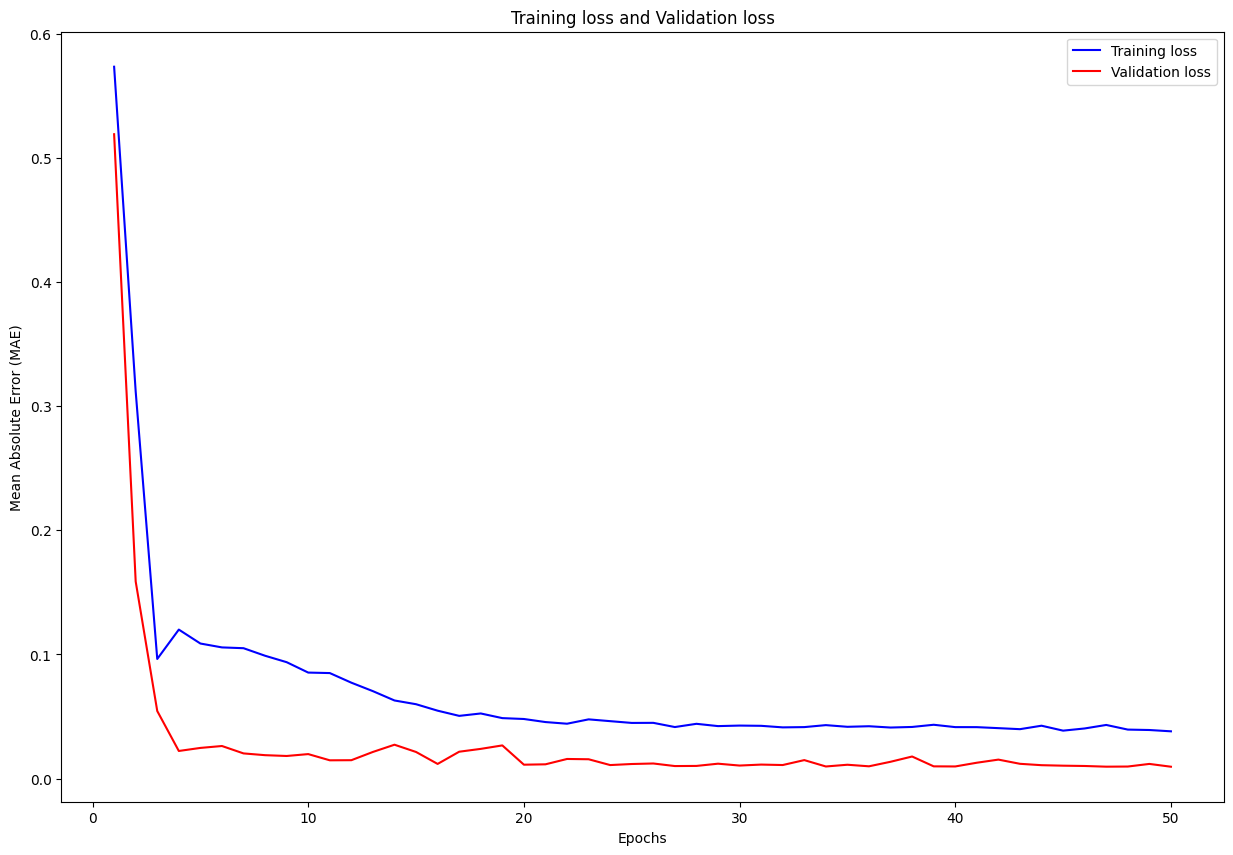

In [102]:
# Membuat plot loss dan validation loss
import matplotlib.pyplot as plt

# Membuat plot loss dan val_loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(15,10))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training loss and Validation loss')
plt.legend(loc='upper right')
plt.show()

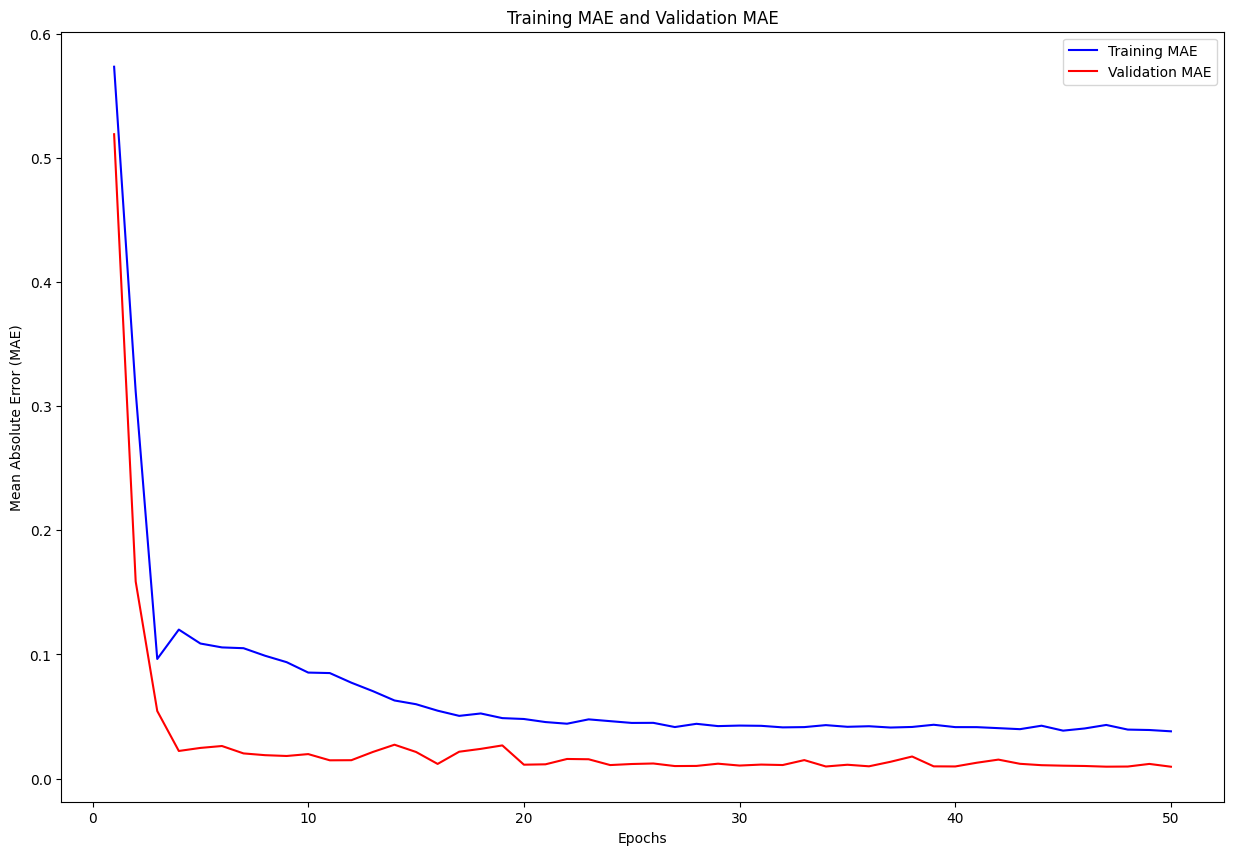

In [103]:
# Membuat plot train mae dan validation mae
import matplotlib.pyplot as plt

# Membuat plot loss dan val_loss
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(mae)+1)

plt.figure(figsize=(15,10))
plt.plot(epochs, mae, 'b', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training MAE and Validation MAE')
plt.legend(loc='upper right')
plt.show()

In [104]:
evaluation = model.evaluate(data_test, verbose=0)

In [105]:
metric_names = model.metrics_names

for metric_name, value in zip(metric_names, evaluation):
    print(f'{metric_name}: {round(value, 3)}')

loss: 0.011
mean_absolute_error: 0.011


In [106]:
y_hat = []

In [107]:
for i in test_df[['close', 'sentiment_score']].values:
  y_hat.append(model.predict(i.reshape(1, 1, 2), verbose=0))

In [108]:
y_hat = [target_scaler.inverse_transform(i) for i in y_hat]

In [109]:
y_hat = [i.reshape(1,) for i in y_hat]

In [110]:
y_hat = pd.DataFrame(y_hat, columns=['target'])

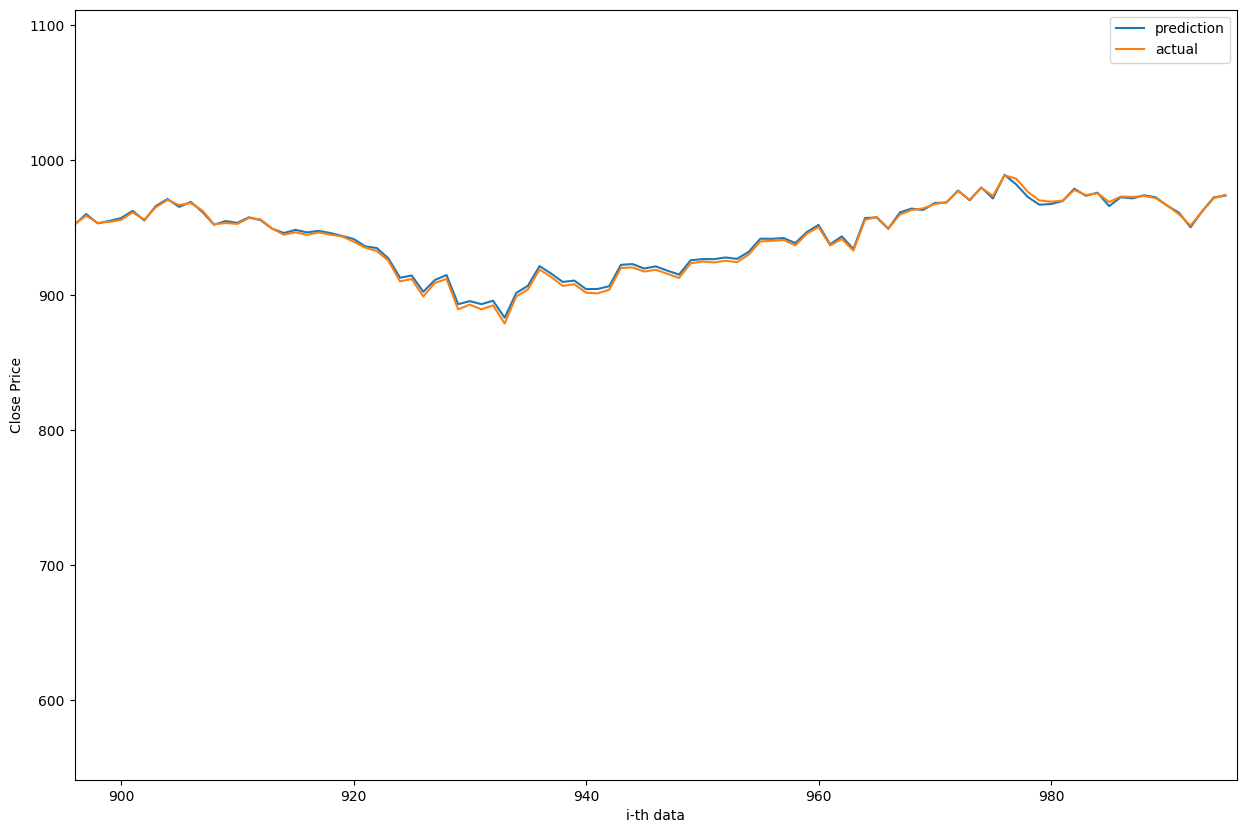

In [111]:
plt.figure(figsize=(15,10))
sns.lineplot(y='target', x=range(896, 996), data=y_hat, label='prediction') # ini bisa ae 877, 973
sns.lineplot(y='close', x=df.index, data=df, label='actual')
plt.xlabel('i-th data')
plt.ylabel('Close Price')
plt.xlim(896, 996)
plt.show()

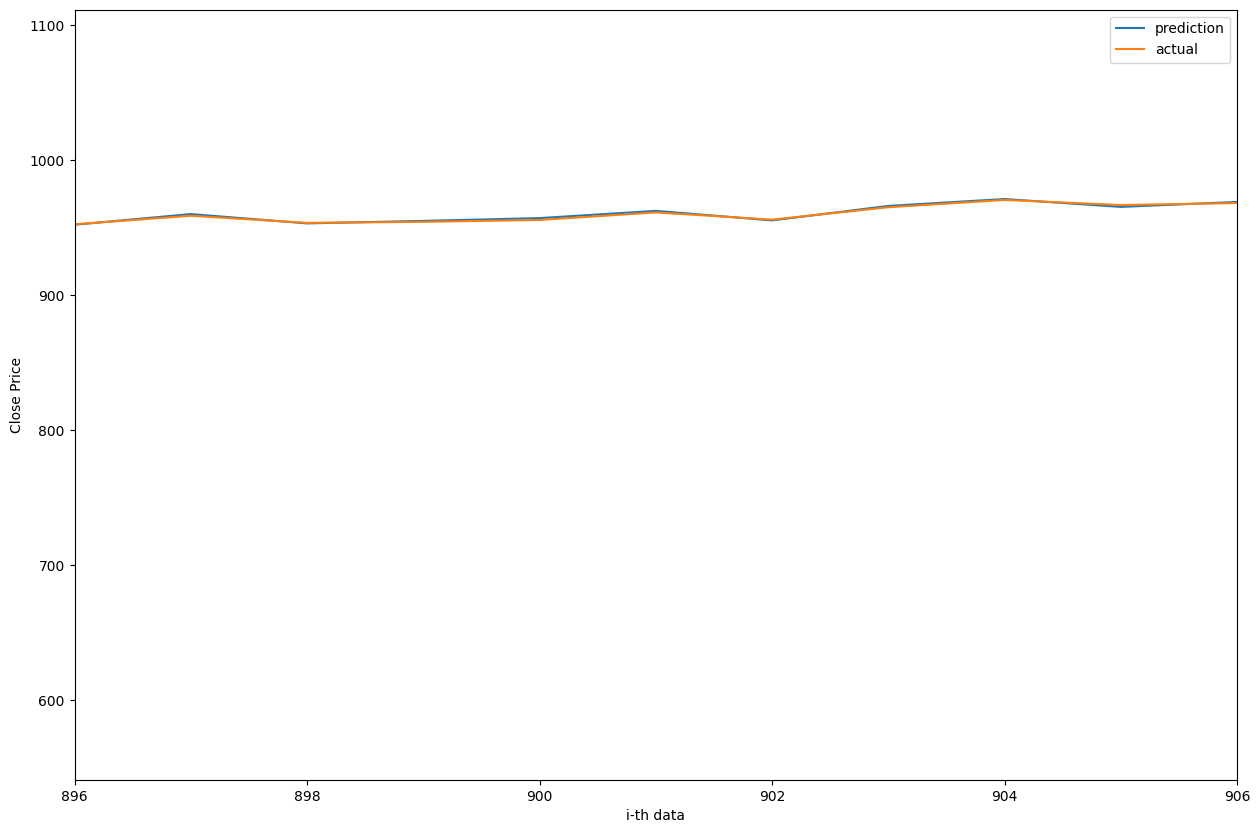

In [112]:
plt.figure(figsize=(15,10))
sns.lineplot(y='target', x=range(896, 996), data=y_hat, label='prediction') # ini bisa ae 877, 973
sns.lineplot(y='close', x=df.index, data=df, label='actual')
plt.xlabel('i-th data')
plt.ylabel('Close Price')
plt.xlim(896, 906)
plt.show()

In [113]:
from sklearn.metrics import mean_absolute_error

mae_test = mean_absolute_error(df['close'].iloc[896:], y_hat) # ini bisa aja 877: ama yhat[:-1]

In [114]:
mae_test

1.613464965820308

In [115]:
model.save('/content/drive/MyDrive/LAMPIRAN SKRIPSI/Tabel dan Data/Model/LAMPIRAN B - MODEL WITH NEWS.h5')

# Hyperparameter Tuning Model with News

In [ ]:
!pip install optuna

In [ ]:
from keras.models import Sequential, Model
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import Dropout
from keras.layers import Input
from keras.optimizers import Adam, SGD
from keras.backend import clear_session

import optuna

In [ ]:
def objective(trial):
  clear_session()

  # parameter for window size
  input_width = trial.suggest_categorical('input_width', [1,5])
  batch_size = trial.suggest_categorical('batch_size', [16, 32])

  # create window data
  data = DataWindow(input_width=input_width, label_width=1, shift=1, label_columns=['target'], batch_size=batch_size)
  data_train = data.train
  data_val = data.val

  # parameter for model
  units = trial.suggest_categorical('units', [50, 100, 200])
  dropout_rate = trial.suggest_float('dropout_rate', 0, 0.5, step=0.1)
  optimizer = trial.suggest_categorical('optimizer', ['adam', 'sgd'])
  epoch = trial.suggest_categorical('epoch', [50, 100])

  learning_rate = trial.suggest_categorical('learning_rate', [0.01, 0.001])

  if optimizer == 'adam':
    optimizer_instance = Adam(learning_rate=learning_rate)
  elif optimizer == 'sgd':
    optimizer_instance = SGD(learning_rate=learning_rate)

  # create a model
  model = Sequential()
  model.add(Bidirectional(LSTM(units=units, activation='relu'), input_shape=(input_width, 2)))
  model.add(Dropout(rate=dropout_rate))
  model.add(Dense(1))

  model.compile(optimizer=optimizer_instance, loss='mae', metrics=['mean_absolute_error'])

  model.fit(
    data_train,
    epochs=epoch,
    validation_data=data_val,
    verbose=False
    )

  score = model.evaluate(data_val)

  return score[1]

In [ ]:
study = optuna.create_study(direction="minimize")

[I 2024-06-03 11:15:29,760] A new study created in memory with name: no-name-5a86924b-48aa-44b6-8cfd-1b01de190855


In [ ]:
study.optimize(objective, n_trials=100, timeout=600)

6/6 [==============================] - 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117


[I 2024-06-03 11:16:17,863] Trial 0 finished with value: 0.011674606241285801 and parameters: {'input_width': 1, 'batch_size': 32, 'units': 100, 'dropout_rate': 0.2, 'optimizer': 'adam', 'epoch': 100, 'learning_rate': 0.001}. Best is trial 0 with value: 0.011674606241285801.


6/6 [==============================] - 0s 9ms/step - loss: 0.0903 - mean_absolute_error: 0.0903


[I 2024-06-03 11:16:38,350] Trial 1 finished with value: 0.09027711302042007 and parameters: {'input_width': 1, 'batch_size': 32, 'units': 100, 'dropout_rate': 0.2, 'optimizer': 'adam', 'epoch': 50, 'learning_rate': 0.01}. Best is trial 0 with value: 0.011674606241285801.


6/6 [==============================] - 0s 6ms/step - loss: 0.0252 - mean_absolute_error: 0.0252


[I 2024-06-03 11:17:43,012] Trial 2 finished with value: 0.025174271315336227 and parameters: {'input_width': 5, 'batch_size': 32, 'units': 200, 'dropout_rate': 0.4, 'optimizer': 'adam', 'epoch': 100, 'learning_rate': 0.001}. Best is trial 0 with value: 0.011674606241285801.


11/11 [==============================] - 0s 5ms/step - loss: 0.0130 - mean_absolute_error: 0.0130


[I 2024-06-03 11:18:39,187] Trial 3 finished with value: 0.01298211794346571 and parameters: {'input_width': 5, 'batch_size': 16, 'units': 200, 'dropout_rate': 0.2, 'optimizer': 'adam', 'epoch': 50, 'learning_rate': 0.01}. Best is trial 0 with value: 0.011674606241285801.


12/12 [==============================] - 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133


[I 2024-06-03 11:19:38,557] Trial 4 finished with value: 0.01329449936747551 and parameters: {'input_width': 1, 'batch_size': 16, 'units': 100, 'dropout_rate': 0.5, 'optimizer': 'adam', 'epoch': 100, 'learning_rate': 0.01}. Best is trial 0 with value: 0.011674606241285801.


6/6 [==============================] - 0s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101


[I 2024-06-03 11:19:59,922] Trial 5 finished with value: 0.010061142966151237 and parameters: {'input_width': 1, 'batch_size': 32, 'units': 200, 'dropout_rate': 0.4, 'optimizer': 'adam', 'epoch': 50, 'learning_rate': 0.001}. Best is trial 5 with value: 0.010061142966151237.


6/6 [==============================] - 0s 5ms/step - loss: 0.0205 - mean_absolute_error: 0.0205


[I 2024-06-03 11:20:36,384] Trial 6 finished with value: 0.02052941918373108 and parameters: {'input_width': 1, 'batch_size': 32, 'units': 50, 'dropout_rate': 0.4, 'optimizer': 'sgd', 'epoch': 100, 'learning_rate': 0.001}. Best is trial 5 with value: 0.010061142966151237.


12/12 [==============================] - 0s 3ms/step - loss: 0.0189 - mean_absolute_error: 0.0189


[I 2024-06-03 11:21:05,711] Trial 7 finished with value: 0.018940962851047516 and parameters: {'input_width': 1, 'batch_size': 16, 'units': 200, 'dropout_rate': 0.30000000000000004, 'optimizer': 'sgd', 'epoch': 50, 'learning_rate': 0.001}. Best is trial 5 with value: 0.010061142966151237.


12/12 [==============================] - 0s 3ms/step - loss: 0.0231 - mean_absolute_error: 0.0231


[I 2024-06-03 11:22:00,418] Trial 8 finished with value: 0.02310212142765522 and parameters: {'input_width': 1, 'batch_size': 16, 'units': 50, 'dropout_rate': 0.4, 'optimizer': 'sgd', 'epoch': 100, 'learning_rate': 0.01}. Best is trial 5 with value: 0.010061142966151237.


11/11 [==============================] - 0s 5ms/step - loss: 0.1135 - mean_absolute_error: 0.1135


[I 2024-06-03 11:22:59,051] Trial 9 finished with value: 0.11351338773965836 and parameters: {'input_width': 5, 'batch_size': 16, 'units': 200, 'dropout_rate': 0.1, 'optimizer': 'adam', 'epoch': 50, 'learning_rate': 0.01}. Best is trial 5 with value: 0.010061142966151237.


6/6 [==============================] - 0s 5ms/step - loss: 0.0203 - mean_absolute_error: 0.0203


[I 2024-06-03 11:23:33,267] Trial 10 finished with value: 0.020311102271080017 and parameters: {'input_width': 5, 'batch_size': 32, 'units': 200, 'dropout_rate': 0.0, 'optimizer': 'sgd', 'epoch': 50, 'learning_rate': 0.001}. Best is trial 5 with value: 0.010061142966151237.


6/6 [==============================] - 0s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0108


[I 2024-06-03 11:24:06,825] Trial 11 finished with value: 0.010793354362249374 and parameters: {'input_width': 1, 'batch_size': 32, 'units': 100, 'dropout_rate': 0.30000000000000004, 'optimizer': 'adam', 'epoch': 100, 'learning_rate': 0.001}. Best is trial 5 with value: 0.010061142966151237.


6/6 [==============================] - 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117


[I 2024-06-03 11:24:45,859] Trial 12 finished with value: 0.011659345589578152 and parameters: {'input_width': 1, 'batch_size': 32, 'units': 100, 'dropout_rate': 0.5, 'optimizer': 'adam', 'epoch': 100, 'learning_rate': 0.001}. Best is trial 5 with value: 0.010061142966151237.


6/6 [==============================] - 0s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100


[I 2024-06-03 11:25:05,895] Trial 13 finished with value: 0.009997336193919182 and parameters: {'input_width': 1, 'batch_size': 32, 'units': 100, 'dropout_rate': 0.30000000000000004, 'optimizer': 'adam', 'epoch': 50, 'learning_rate': 0.001}. Best is trial 13 with value: 0.009997336193919182.


6/6 [==============================] - 0s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0116


[I 2024-06-03 11:25:24,954] Trial 14 finished with value: 0.011570064350962639 and parameters: {'input_width': 1, 'batch_size': 32, 'units': 50, 'dropout_rate': 0.30000000000000004, 'optimizer': 'adam', 'epoch': 50, 'learning_rate': 0.001}. Best is trial 13 with value: 0.009997336193919182.


6/6 [==============================] - 0s 5ms/step - loss: 0.0098 - mean_absolute_error: 0.0098


[I 2024-06-03 11:25:45,378] Trial 15 finished with value: 0.0097996536642313 and parameters: {'input_width': 1, 'batch_size': 32, 'units': 200, 'dropout_rate': 0.4, 'optimizer': 'adam', 'epoch': 50, 'learning_rate': 0.001}. Best is trial 15 with value: 0.0097996536642313.


In [ ]:
trial = study.best_trial

In [ ]:
print("Value: {}".format(trial.value))

Value: 0.0097996536642313


In [ ]:
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

  Params: 
    input_width: 1
    batch_size: 32
    units: 200
    dropout_rate: 0.4
    optimizer: adam
    epoch: 50
    learning_rate: 0.001


# Use saved model

In [ ]:
from keras.models import load_model

model_path = '/content/drive/MyDrive/LAMPIRAN SKRIPSI/Tabel dan Data/Model/LAMPIRAN B - MODEL WITH NEWS.h5'
model = load_model(model_path)